In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import classification_report as CR
nltk.download('stopwords')

data = pd.read_csv('spam.csv', encoding='latin-1')
print(data.head())
print(data.isnull().sum()/data.shape[0])
data = data.iloc[:,0:2]
le = LE()
data['v1'] = le.fit_transform(data['v1'])
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
data['text_clean'] = data['v2'].apply(clean_text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text_clean'])
y = data['v1']
sm = SMOTE(random_state=42)
x_new, y_new = sm.fit_resample(X, y)
x_train, x_test, y_train, y_test = TTS(x_new, y_new, random_state=42, test_size=0.25)
model = SVC(random_state = 42, kernel='linear')
model.fit(x_train, y_train)
print('Train accuracy = ', model.score(x_train, y_train), '\nTest Accuracy = ',model.score(x_test, y_test))
y_pred = model.predict(x_test)
print(CR(y_test, y_pred))

[nltk_data] Downloading package stopwords to C:\Users\Hemang
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     v1                                                 v2 Unnamed: 2 Unnamed: 3 Unnamed: 4
0   ham  Go until jurong point, crazy.. Available only ...        NaN        NaN        NaN
1   ham                      Ok lar... Joking wif u oni...        NaN        NaN        NaN
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN        NaN        NaN
3   ham  U dun say so early hor... U c already then say...        NaN        NaN        NaN
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN        NaN        NaN
v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64
Train accuracy =  0.9995854635898853 
Test Accuracy =  0.9958557811852465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      0.99      1.00      1187

    accuracy                           1.00      2413
   macro avg       1.00   

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD, confusion_matrix as cm
import matplotlib.pyplot as plt

In [3]:
mat = cm(y_test, y_pred)

In [4]:
disp = CMD(mat, display_labels=model.classes_)

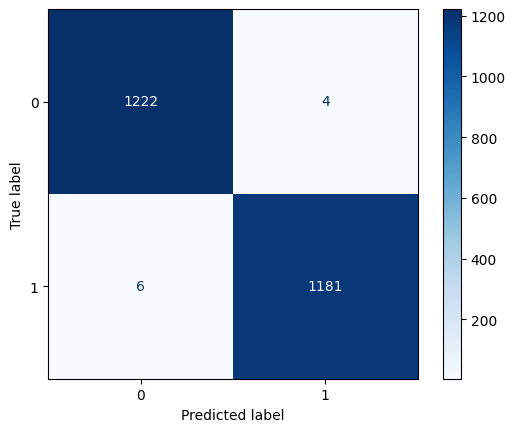

In [7]:
disp = CMD(mat, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [8]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [9]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [10]:
joblib.dump(vectorizer, 'text_clean.pkl')

['text_clean.pkl']